### <font color='red'> Project Part1 : Buzz Prediction on Twitter - Explore Regression Algorithms

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

## Objective

-  To predict the Buzz Magnitude (mean number of active discussions) of each topic in Twitter.
    - Sample the dataset using randomization and stratification.
    - Fit different regression algorithms on the sample data.
        - Select hyperparametrs for each regression algorithm using Grid Search CV.
    - Choose evaluation metric and select the best model based on train and test scores.
    - Run the entire dataset on the best model and predict the outcome.

## Package import

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',-1)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
columns =['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Annotation']

In [508]:
df_reg =  pd.read_csv('Twitter.data',header=None,names=columns,index_col=False)

## Exploratory Data Analysis

#### _Check for missing data_

In [423]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0         583250 non-null int64
NCD_1         583250 non-null int64
NCD_2         583250 non-null int64
NCD_3         583250 non-null int64
NCD_4         583250 non-null int64
NCD_5         583250 non-null int64
NCD_6         583250 non-null int64
AI_0          583250 non-null int64
AI_1          583250 non-null int64
AI_2          583250 non-null int64
AI_3          583250 non-null int64
AI_4          583250 non-null int64
AI_5          583250 non-null int64
AI_6          583250 non-null int64
AS(NA)_0      583250 non-null float64
AS(NA)_1      583250 non-null float64
AS(NA)_2      583250 non-null float64
AS(NA)_3      583250 non-null float64
AS(NA)_4      583250 non-null float64
AS(NA)_5      583250 non-null float64
AS(NA)_6      583250 non-null float64
BL_0          583250 non-null float64
BL_1          583250 non-null float64
BL_2          583250 non-null float64
BL_3 

In [424]:
df_reg.isnull().values.any()

False

*It can be observed that there are no missing values in the dataset.*

#### _Dataset Summary_

In [427]:
df_reg.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


#### _Visualizations_

#### 1. Author Increase Trend on average Across Dataset

In [512]:
def summ_data(df,start):
    cols = [col for col in df if col.startswith(start)]
    a = start+'_median'
    df[a]=df[cols].median(axis=1)
    b = start+'_mean'
    df[b]=df[cols].mean(axis=1)
    c = start+'_std'
    df[c]=df[cols].std(axis=1)
col=['NCD','AI','AS(NA)','BL','NAC','AS(NAC)','CS','AT','NA','ADL','NAD','Annotation']
df_viz = pd.DataFrame()
for i in range(0,len(col)):
    summ_data(df_reg,col[i])

In [513]:
df_AI_median = pd.DataFrame(df_reg[['AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6']].median().reset_index()).rename(columns={"index":"AI",0:"Median_increase"})
df_AI_mean = pd.DataFrame(df_reg[['AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6']].mean().reset_index()).rename(columns={"index":"AI",0:"Mean_increase"})
df_NAD_median = pd.DataFrame(df_reg[['NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6']].median().reset_index()).rename(columns={"index":"NAD",0:"Median_increase"})
df_NAD_mean = pd.DataFrame(df_reg[['NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6']].mean().reset_index()).rename(columns={"index":"NAD",0:"Mean_increase"})
df_ADL_median = pd.DataFrame(df_reg[['ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6']].median().reset_index()).rename(columns={"index":"ADL",0:"Median_increase"})
df_ADL_mean = pd.DataFrame(df_reg[['ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6']].mean().reset_index()).rename(columns={"index":"ADL",0:"Mean_increase"})

In [605]:
def drawLineChart(df1,df2,title,xlabel,ylabel):
    n = len(df1)
    xaxis = df1.iloc[:,0].unique()
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111,facecolor='darkslategray')
    ax.plot(df1.iloc[:,0],df1.iloc[:,1], color='lightgreen',linewidth=2,alpha=0.7)
    ax.plot(df2.iloc[:,0],df2.iloc[:,1], color='cyan',linewidth=2,alpha=0.7)
    ax.set_title(title,fontsize=20,weight='bold')
    for i,j in zip(df1.iloc[:,0],round(df1.iloc[:,1],2)):
        ax.annotate(str(j),xy=(i,j),color='white',weight='bold')
    for i,j in zip(df2.iloc[:,0],round(df2.iloc[:,1],2)):
        ax.annotate(str(j),xy=(i,j),color='white',weight='bold')
    ax.set_xlabel(xlabel, fontsize=12,weight='bold')
    ax.set_ylabel(ylabel,fontsize=12,weight='bold')
    handles,labels= ax.get_legend_handles_labels()
    ax.legend(handles,labels)
    plt.show()

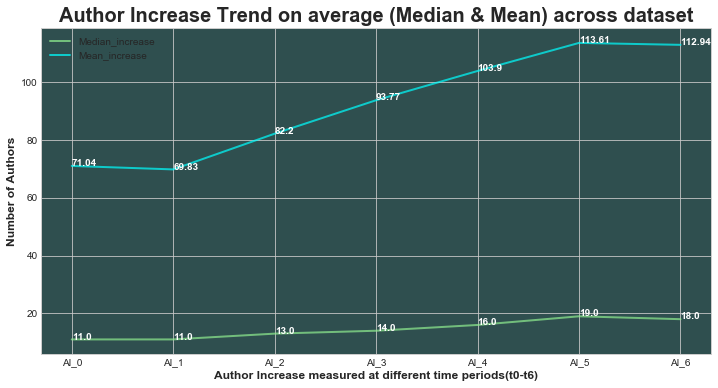

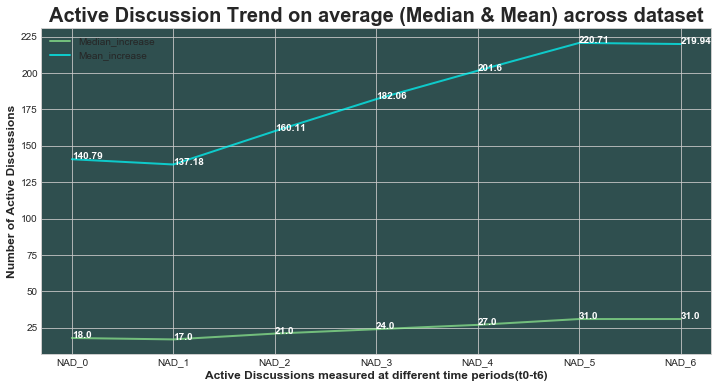

In [613]:
drawLineChart(df_AI_median,df_AI_mean,'Author Increase Trend on average (Median & Mean) across dataset','Author Increase measured at different time periods(t0-t6)','Number of Authors')
drawLineChart(df_NAD_median,df_NAD_mean,'Active Discussion Trend on average (Median & Mean) across dataset','Active Discussions measured at different time periods(t0-t6)','Number of Active Discussions')

_From the plot, we can infer the following_
-  _Increase in number of new authors over time follows an increasing trend indicating that most of the tweets in the dataset has gained popularity over the time period measured_ 
- _Similarly, the number of active discussions on instance's topic seems to be on the raise with increase in time period_

#### 2. Skewness of the Independent Variables

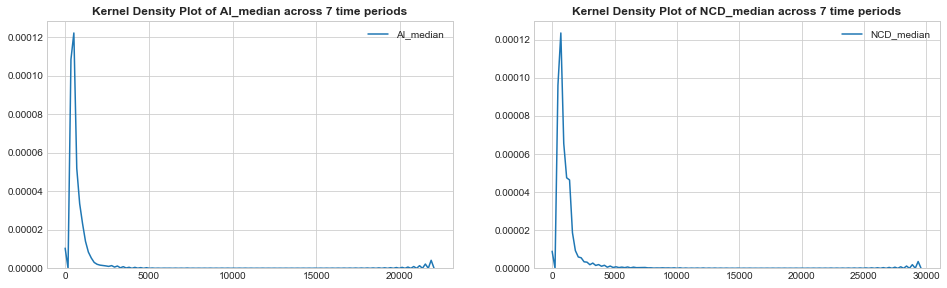

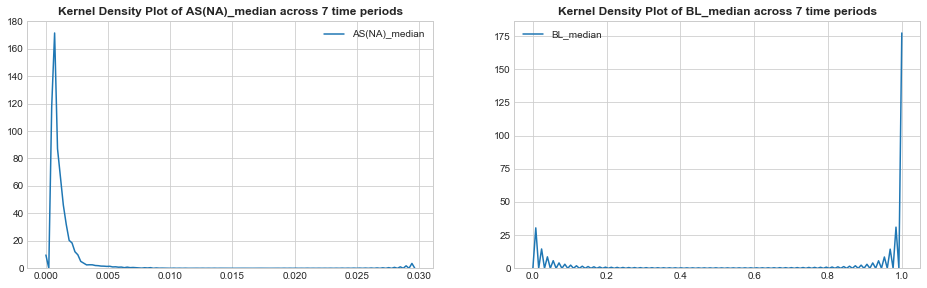

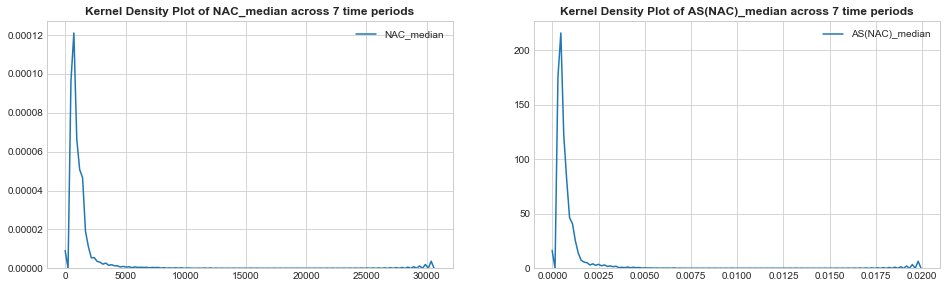

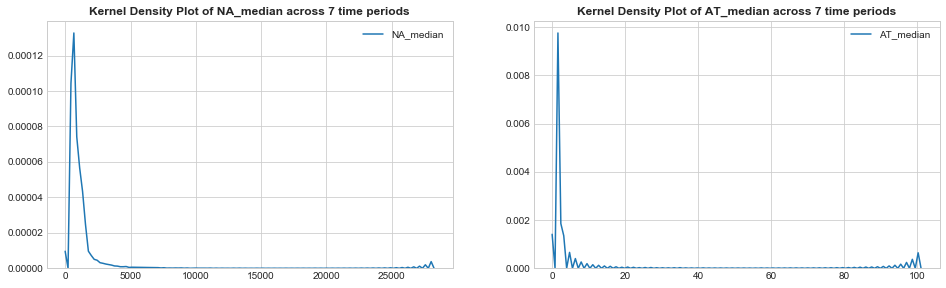

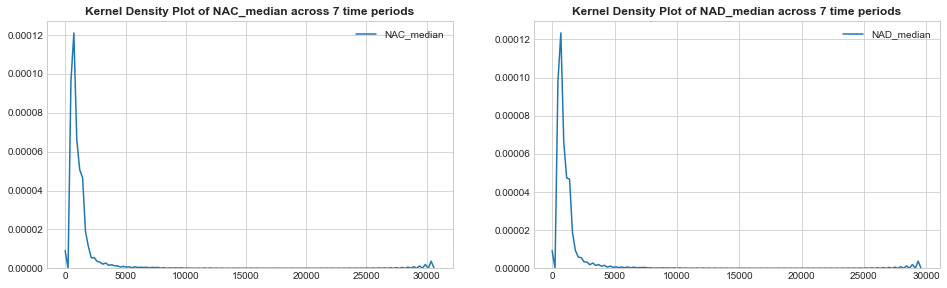

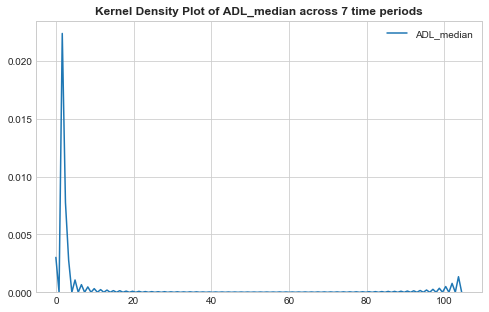

In [516]:
import seaborn as sns
def kde_plot_medians(df,col1,col2):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(16,10))
    plt.subplot(221)
    sns.kdeplot(df[col1])
    plt.title('Kernel Density Plot of ' + col1 +' across 7 time periods',fontsize=12,weight='bold')
    plt.grid(True)
    plt.subplot(222)
    sns.kdeplot(df[col2])
    plt.title('Kernel Density Plot of ' + col2 + ' across 7 time periods',fontsize=12,weight='bold')
    plt.grid(True)
    plt.show()
kde_plot_medians(df_reg,'AI_median', 'NCD_median')
kde_plot_medians(df_reg,'AS(NA)_median', 'BL_median')
kde_plot_medians(df_reg,'NAC_median', 'AS(NAC)_median')
kde_plot_medians(df_reg,'NA_median', 'AT_median')
kde_plot_medians(df_reg,'NAC_median', 'NAD_median')
sns.set_style("whitegrid")
fig = plt.figure(figsize=(8,5))
sns.kdeplot(df_reg['ADL_median'])
plt.title('Kernel Density Plot of ADL_median across 7 time periods',fontsize=12,weight='bold')
plt.grid(True)
plt.show()

_All the column values are of different scale and most of the column values are right skewed._

In [517]:
df_reg['CS_Group'] = ['Low' if val <0.5 else ('Medium' if (val >=0.5 and val <0.7) 
                                else 'High') for val in df_reg['CS_mean']]

_The Contribution Sparseness feature is grouped in categories - Low(<0.5), Medium(>=0.5 but <0.7) and High(>=0.7)_

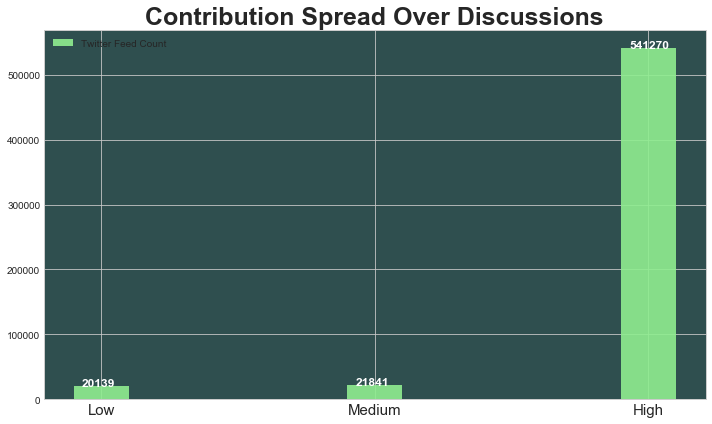

In [564]:
df_summ = df_reg['CS_Group'].value_counts().sort_values(ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,facecolor='darkslategray')
index = df_summ.index.unique()
y_pos = np.arange(len(index))
bar_width=0.2
opacity=0.9
plt.bar(y_pos,df_summ.values,bar_width,alpha=opacity,color='lightgreen',label='Twitter Feed Count')
for i,j in zip(y_pos,df_summ.values):
    ax.annotate(str(j),xy=(i-0.07,j),color='white',fontsize=12,weight='bold')
plt.title("Contribution Spread Over Discussions",fontsize=25,weight='bold')
plt.xticks(y_pos,index,fontsize=15)
plt.tight_layout()
plt.legend()
plt.show()

_The above chart shows the grouping & distribution of Contribution Sparseness - measure of spreading of contributions over discussion for the instance's topic(0 to 1). From plot we can easily observe, that large amount of twitter feeds in the dataset are on the higher end of the scale._

## Evaluation Strategy

**Accuracy Score ($R^2$)** - Percentage of variance in the dependent variable explained by all the features. $R^2$ lies in a range between 0 and 1 with values closer to 1 indicating a very good model fit

#### _Data Sampling_

_Taking 10% of the data from entire dataset using randomization and stratification techniques._

In [608]:
X = df_reg.iloc[:,0:77]
y =df_reg['Annotation']
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1,random_state=18)

#### _Train-Test Split and Scaling_

_Splitting the sample dataset into train set (80%) and test set (20%)_

_Applying MinMaxScaler() on train and test sets to scale the column values between 0 and 1. MinMaxScaler() reduces skewness but doesn't remove it. Since the column values are in the range of 0 to 1, the results will be consistent._

In [6]:
## Train and Test dataset for the cross-validation and Grid Search models
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, test_size = 0.2,random_state=18)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
## Train and Test dataset for the optimized model
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size = 0.2,random_state=18)
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

In [7]:
X_train.shape

(46660, 77)

#### _Grid Search - Method for plotting the Train & Test Scores_

In [570]:
def grid_train_test_plot(df,col,train,test,title,xlabel,ylabel,width,height,flag):
    fig = plt.figure(figsize=(width,height))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111,facecolor='white')
    ax.plot(df[col], df[train], c = 'g', linewidth=2, alpha=0.7,label='Train Accuracy Score')
    ax.plot(df[col], df[test], c = 'b',linewidth=2, alpha=0.7,label='Test Accuracy Score')
    ax.scatter(df[col], df[train], c = 'g', alpha=0.7,label='Train Accuracy Score')
    ax.scatter(df[col], df[test], c = 'b',alpha=0.7,label='Test Accuracy Score')
    if(flag=='show'):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
    ax.legend()
    plt.grid(zorder=0)
    ax.set_title(title,fontsize=20,weight='bold')
    ax.set_xlabel(xlabel,fontsize=10,weight='bold')
    ax.set_ylabel(ylabel,fontsize=10,weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    plt.show()

## Grid Search, Cross Validation with Linear Regression

In [8]:
linreg=LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}

lreg_grid_search = GridSearchCV(linreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
lreg_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(lreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lreg_grid_search.best_score_))

Best parameters: {'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.94


In [138]:
lregresults = pd.DataFrame(lreg_grid_search.cv_results_)
lregresults['identifier'] = lregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))

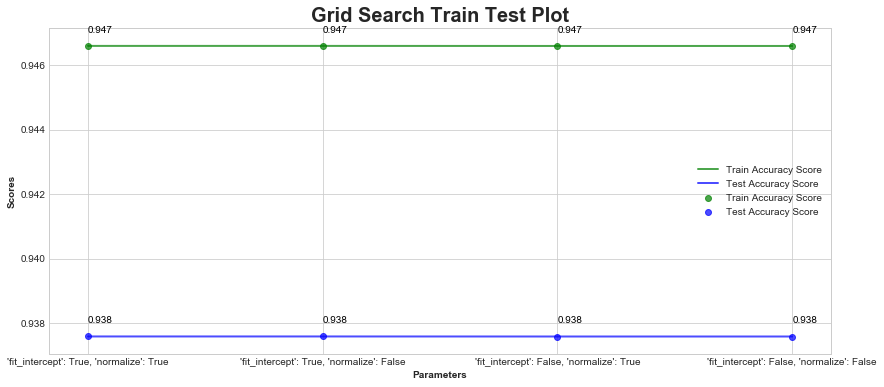

In [571]:
grid_train_test_plot(lregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'show')

In [9]:
lreg_accuracy_train = lreg_grid_search.best_estimator_.score(X_train, y_train)
lreg_accuracy_test = lreg_grid_search.best_estimator_.score(X_test, y_test)

print('Linear Regression - Train Accuracy: %.2f'%lreg_accuracy_train)
print('Linear Regression - Test Accuracy: %.2f '%lreg_accuracy_test)

Linear Regression - Train Accuracy: 0.95
Linear Regression - Test Accuracy: 0.96 


In [308]:
report_table = [['Linear Regression', str(lreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),lreg_accuracy_train,lreg_accuracy_test ]]

## Grid Search, Cross Validation with SGD Regression

In [10]:
sgdreg=SGDRegressor(random_state=18)
parameters = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'], 'penalty':[None,'l2','l1','elasticnet'],'alpha':[0.0001,0.001,0.01,0.05,0.1,1,10],'learning_rate':['constant','optimal','invscaling'] }

sgdreg_grid_search = GridSearchCV(sgdreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
sgdreg_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(sgdreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(sgdreg_grid_search.best_score_))

Best parameters: {'alpha': 0.05, 'learning_rate': 'constant', 'loss': 'squared_epsilon_insensitive', 'penalty': 'l1'}
Best cross-validation score: 0.93


In [11]:
sgdreg_accuracy_train = sgdreg_grid_search.best_estimator_.score(X_train, y_train)
sgdreg_accuracy_test = sgdreg_grid_search.best_estimator_.score(X_test, y_test)

print('SGD Regression - Train Accuracy: %.2f'%sgdreg_accuracy_train)
print('SGD Regression - Test Accuracy: %.2f '%sgdreg_accuracy_test)

SGD Regression - Train Accuracy: 0.92
SGD Regression - Test Accuracy: 0.93 


In [309]:
report_table = report_table + [['SGD Regression', str(sgdreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),sgdreg_accuracy_train,sgdreg_accuracy_test ]]

## Grid Search, Cross Validation with KNearestNeighbors

In [12]:
knnreg = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(1,11,1)}
knnreg_grid_search = GridSearchCV(knnreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
knnreg_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(knnreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(knnreg_grid_search.best_score_))

Best parameters: {'n_neighbors': 4}
Best cross-validation score: 0.91


### _Visualize the accuracy scores of KNN Regressor_

Text(0,0.5,'Cross-Validated Accuracy')

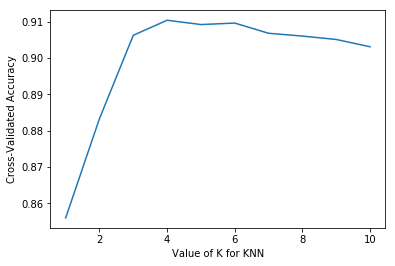

In [274]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in knnreg_grid_search.grid_scores_]
# plot the results cross-validation accuracy
plt.plot(np.arange(1,11,1), grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [163]:
knnresults = pd.DataFrame(knnreg_grid_search.cv_results_)

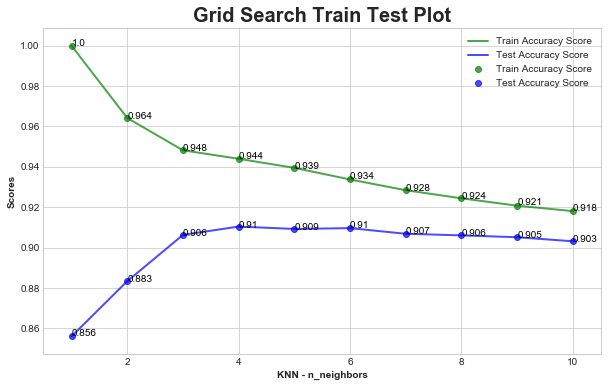

In [572]:
grid_train_test_plot(knnresults,'param_n_neighbors','mean_train_score','mean_test_score','Grid Search Train Test Plot','KNN - n_neighbors','Scores',10,6,'show')

In [88]:
knnreg_accuracy_train = knnreg_grid_search.best_estimator_.score(X_train, y_train)
knnreg_accuracy_test = knnreg_grid_search.best_estimator_.score(X_test, y_test)

print('KNN Regression - Train Accuracy: %.2f'%knnreg_accuracy_train)
print('KNN Regression - Test Accuracy: %.2f '%knnreg_accuracy_test)

KNN Regression - Train Accuracy: 0.95
KNN Regression - Test Accuracy: 0.89 


In [310]:
report_table = report_table + [['KNN Regression', str(knnreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),knnreg_accuracy_train,knnreg_accuracy_test ]]

## Grid Search, Cross Validation with Ridge Regression

In [14]:
ridgreg = Ridge(random_state=18)
parameters = {'alpha':[0.001,0.01,0.1,0.5,1,10,100],'fit_intercept':[True,False],'normalize':[True,False]}

ridgreg_grid_search = GridSearchCV(ridgreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
ridgreg_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(ridgreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ridgreg_grid_search.best_score_))

Best parameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.94


In [215]:
ridgregresults = pd.DataFrame(ridgreg_grid_search.cv_results_)
ridgregresults['identifier_name'] = ridgregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
ridgregresults['identifier'] = (ridgregresults.index)

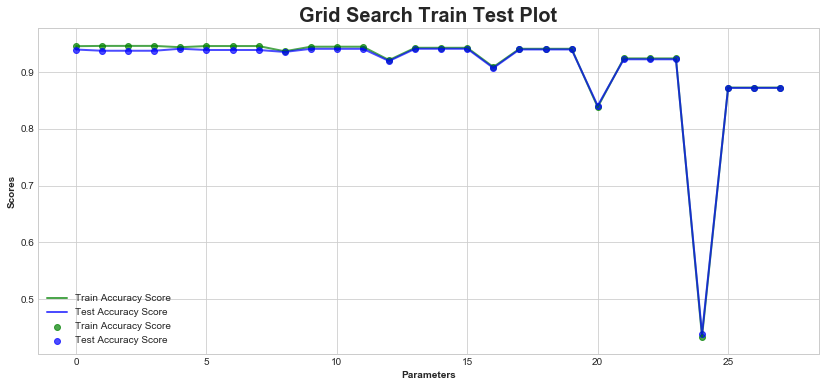

In [573]:
grid_train_test_plot(ridgregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')

In [257]:
ridgregresults[['identifier','identifier_name']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
identifier,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
identifier_name,"'alpha': 0.001, 'fit_intercept': True, 'normalize': True","'alpha': 0.001, 'fit_intercept': True, 'normalize': False","'alpha': 0.001, 'fit_intercept': False, 'normalize': True","'alpha': 0.001, 'fit_intercept': False, 'normalize': False","'alpha': 0.01, 'fit_intercept': True, 'normalize': True","'alpha': 0.01, 'fit_intercept': True, 'normalize': False","'alpha': 0.01, 'fit_intercept': False, 'normalize': True","'alpha': 0.01, 'fit_intercept': False, 'normalize': False","'alpha': 0.1, 'fit_intercept': True, 'normalize': True","'alpha': 0.1, 'fit_intercept': True, 'normalize': False",...,"'alpha': 1, 'fit_intercept': False, 'normalize': True","'alpha': 1, 'fit_intercept': False, 'normalize': False","'alpha': 10, 'fit_intercept': True, 'normalize': True","'alpha': 10, 'fit_intercept': True, 'normalize': False","'alpha': 10, 'fit_intercept': False, 'normalize': True","'alpha': 10, 'fit_intercept': False, 'normalize': False","'alpha': 100, 'fit_intercept': True, 'normalize': True","'alpha': 100, 'fit_intercept': True, 'normalize': False","'alpha': 100, 'fit_intercept': False, 'normalize': True","'alpha': 100, 'fit_intercept': False, 'normalize': False"


In [15]:
ridgreg_accuracy_train = ridgreg_grid_search.best_estimator_.score(X_train, y_train)
ridgreg_accuracy_test = ridgreg_grid_search.best_estimator_.score(X_test, y_test)

print('Ridge Regression - Train Accuracy: %.2f'%ridgreg_accuracy_train)
print('Ridge Regression - Test Accuracy: %.2f '%ridgreg_accuracy_test)

Ridge Regression - Train Accuracy: 0.94
Ridge Regression - Test Accuracy: 0.96 


In [311]:
report_table = report_table + [['Ridge Regression', str(ridgreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),ridgreg_accuracy_train,ridgreg_accuracy_test ]]

## Grid Search, Cross Validation with LASSO Regression

In [16]:
lassoreg = Lasso(random_state=18)
parameters = {'alpha':[0.001,0.01,0.1,0.5,1,10,100],'fit_intercept':[True,False],'normalize':[True,False],'selection':['cyclic','random']}

lasso_grid_search = GridSearchCV(lassoreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
lasso_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(lasso_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lasso_grid_search.best_score_))

Best parameters: {'alpha': 0.01, 'fit_intercept': False, 'normalize': True, 'selection': 'random'}
Best cross-validation score: 0.94


In [218]:
lassoregresults = pd.DataFrame(lasso_grid_search.cv_results_)
lassoregresults['identifier_name'] = lassoregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
lassoregresults['identifier'] = (lassoregresults.index)

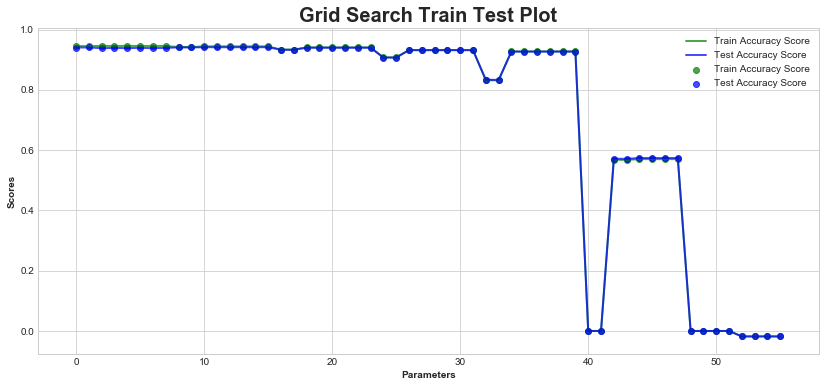

In [574]:
grid_train_test_plot(lassoregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')

In [258]:
lassoregresults[['identifier','identifier_name']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
identifier,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
identifier_name,"'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'selection': 'cyclic'","'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'selection': 'random'","'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'","'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'selection': 'random'","'alpha': 0.001, 'fit_intercept': False, 'normalize': True, 'selection': 'cyclic'","'alpha': 0.001, 'fit_intercept': False, 'normalize': True, 'selection': 'random'","'alpha': 0.001, 'fit_intercept': False, 'normalize': False, 'selection': 'cyclic'","'alpha': 0.001, 'fit_intercept': False, 'normalize': False, 'selection': 'random'","'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'selection': 'cyclic'","'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'selection': 'random'",...,"'alpha': 10, 'fit_intercept': False, 'normalize': False, 'selection': 'cyclic'","'alpha': 10, 'fit_intercept': False, 'normalize': False, 'selection': 'random'","'alpha': 100, 'fit_intercept': True, 'normalize': True, 'selection': 'cyclic'","'alpha': 100, 'fit_intercept': True, 'normalize': True, 'selection': 'random'","'alpha': 100, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'","'alpha': 100, 'fit_intercept': True, 'normalize': False, 'selection': 'random'","'alpha': 100, 'fit_intercept': False, 'normalize': True, 'selection': 'cyclic'","'alpha': 100, 'fit_intercept': False, 'normalize': True, 'selection': 'random'","'alpha': 100, 'fit_intercept': False, 'normalize': False, 'selection': 'cyclic'","'alpha': 100, 'fit_intercept': False, 'normalize': False, 'selection': 'random'"


In [17]:
lassoreg_accuracy_train = lasso_grid_search.best_estimator_.score(X_train, y_train)
lassoreg_accuracy_test = lasso_grid_search.best_estimator_.score(X_test, y_test)

print('Lasso Regression - Train Accuracy: %.2f'%lassoreg_accuracy_train)
print('Lasso Regression - Test Accuracy: %.2f '%lassoreg_accuracy_test)

Lasso Regression - Train Accuracy: 0.94
Lasso Regression - Test Accuracy: 0.96 


In [312]:
report_table = report_table + [['Lasso Regression', str(lasso_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),lassoreg_accuracy_train,lassoreg_accuracy_test ]]

## Grid Search, Cross Validation with Polynomial Regression

In [18]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [19]:
param_grid = {'polynomialfeatures__degree': np.arange(2,3),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

poly_grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=2, n_jobs = -1)

poly_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(poly_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(poly_grid_search.best_score_))

Best parameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
Best cross-validation score: -28.11


In [239]:
polyregresults = pd.DataFrame(poly_grid_search.cv_results_)
polyregresults['identifier_name'] = polyregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
polyregresults['identifier'] = polyregresults.index

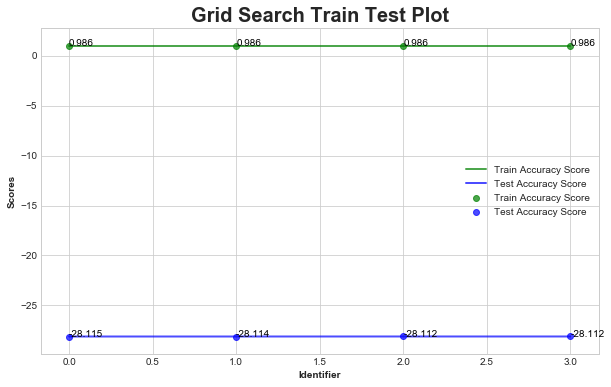

In [575]:
grid_train_test_plot(polyregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',10,6,'show')

In [259]:
polyregresults[['identifier','identifier_name']].transpose()

,0,1,2,3
identifier,0,1,2,3
identifier_name,"'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2","'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 2","'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2","'linearregression__fit_intercept': False, 'linearregression__normalize': False, 'polynomialfeatures__degree': 2"


In [34]:
polyreg_accuracy_train = poly_grid_search.best_estimator_.score(X_train, y_train)
polyreg_accuracy_test = poly_grid_search.best_estimator_.score(X_test, y_test)

print('Polynomial Regression - Train Accuracy: %.2f'%polyreg_accuracy_train)
print('Polynomial Regression - Test Accuracy: %.2f '%polyreg_accuracy_test)

Polynomial Regression - Train Accuracy: 0.98
Polynomial Regression - Test Accuracy: 0.23 


In [313]:
report_table = report_table + [['Polynomial Regression', str(poly_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),polyreg_accuracy_train,polyreg_accuracy_test ]]

## Grid Search, Cross Validation with Linear SVR

In [278]:
linsvrreg = LinearSVR(random_state=18)
parameters = {'C':[0.1,1,10],'epsilon':[0.1,1], 'loss':['epsilon_insensitive', 'squared_epsilon_insensitive']}

linsvr_grid_search = GridSearchCV(linsvrreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
linsvr_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(linsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(linsvr_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:  1.3min remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.6min finished


Best parameters: {'C': 1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.94


In [279]:
linsvrresults = pd.DataFrame(linsvr_grid_search.cv_results_)
linsvrresults['identifier_name'] = linsvrresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
linsvrresults['identifier'] = (linsvrresults.index)

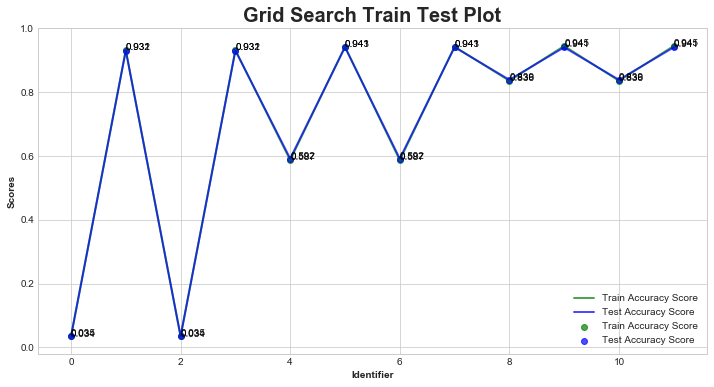

In [576]:
grid_train_test_plot(linsvrresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'show')

In [281]:
linsvrresults[['identifier','identifier_name']].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
identifier,0,1,2,3,4,5,6,7,8,9,10,11
identifier_name,"'C': 0.1, 'epsilon': 0.1, 'loss': 'epsilon_insensitive'","'C': 0.1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive'","'C': 0.1, 'epsilon': 1, 'loss': 'epsilon_insensitive'","'C': 0.1, 'epsilon': 1, 'loss': 'squared_epsilon_insensitive'","'C': 1, 'epsilon': 0.1, 'loss': 'epsilon_insensitive'","'C': 1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive'","'C': 1, 'epsilon': 1, 'loss': 'epsilon_insensitive'","'C': 1, 'epsilon': 1, 'loss': 'squared_epsilon_insensitive'","'C': 10, 'epsilon': 0.1, 'loss': 'epsilon_insensitive'","'C': 10, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive'","'C': 10, 'epsilon': 1, 'loss': 'epsilon_insensitive'","'C': 10, 'epsilon': 1, 'loss': 'squared_epsilon_insensitive'"


In [282]:
linsvrreg_accuracy_train = linsvr_grid_search.best_estimator_.score(X_train, y_train)
linsvrreg_accuracy_test = linsvr_grid_search.best_estimator_.score(X_test, y_test)

print('Linear SVR Regression - Train Accuracy: %.2f'%linsvrreg_accuracy_train)
print('Linear SVR Regression - Test Accuracy: %.2f '%linsvrreg_accuracy_test)

Linear SVR Regression - Train Accuracy: 0.94
Linear SVR Regression - Test Accuracy: 0.96 


In [314]:
report_table = report_table + [['Linear SVR Regression', str(linsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),linsvrreg_accuracy_train,linsvrreg_accuracy_test ]]

## Grid Search, Cross Validation with Linear Kernel SVR

In [22]:
svrlinreg = SVR(kernel='linear')
parameters = {'C':[0.1,1,10],'epsilon':[0.1,1]}

lsvr_grid_search = GridSearchCV(svrlinreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
lsvr_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(lsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lsvr_grid_search.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 37.0min remaining: 21.4min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 37.1min remaining: 11.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 44.4min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 44.9min finished


Best parameters: {'C': 10, 'epsilon': 1}
Best cross-validation score: 0.84


In [260]:
svrlinresults = pd.DataFrame(lsvr_grid_search.cv_results_)
svrlinresults['identifier'] = svrlinresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))

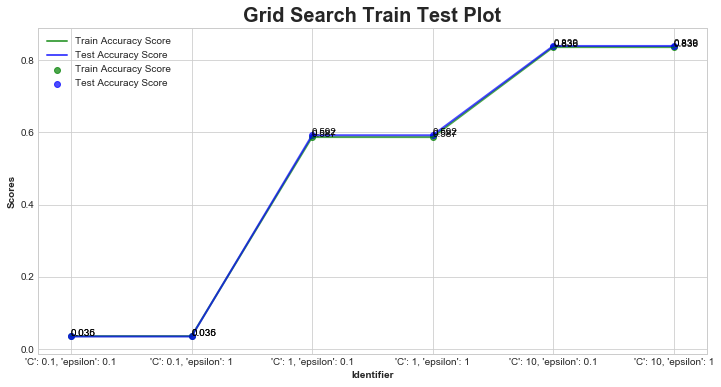

In [577]:
grid_train_test_plot(svrlinresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'show')

In [23]:
lsvrreg_accuracy_train = lsvr_grid_search.best_estimator_.score(X_train, y_train)
lsvrreg_accuracy_test = lsvr_grid_search.best_estimator_.score(X_test, y_test)

print('Linear Kernel SVR Regression - Train Accuracy: %.2f'%lsvrreg_accuracy_train)
print('Linear Kernel SVR Regression - Test Accuracy: %.2f '%lsvrreg_accuracy_test)

Linear Kernel SVR Regression - Train Accuracy: 0.84
Linear Kernel SVR Regression - Test Accuracy: 0.87 


In [315]:
report_table = report_table + [['Linear Kernel SVR Regression', str(lsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),lsvrreg_accuracy_train,lsvrreg_accuracy_test ]]

## Grid Search, Cross Validation with rbf Kernel SVR

In [24]:
svrrbfreg = SVR(kernel='rbf')
parameters = {'C':[0.1,1,10],'gamma':[0.0001,0.001],'epsilon':[0.1,1]}

rsvr_grid_search = GridSearchCV(svrrbfreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
rsvr_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(rsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rsvr_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 61.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 91.8min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 104.3min remaining: 16.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 111.7min finished


Best parameters: {'C': 10, 'epsilon': 1, 'gamma': 0.001}
Best cross-validation score: -0.05


In [268]:
svrrbfresults = pd.DataFrame(rsvr_grid_search.cv_results_)
svrrbfresults['identifier_name'] = svrrbfresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
svrrbfresults['identifier'] = svrrbfresults.index

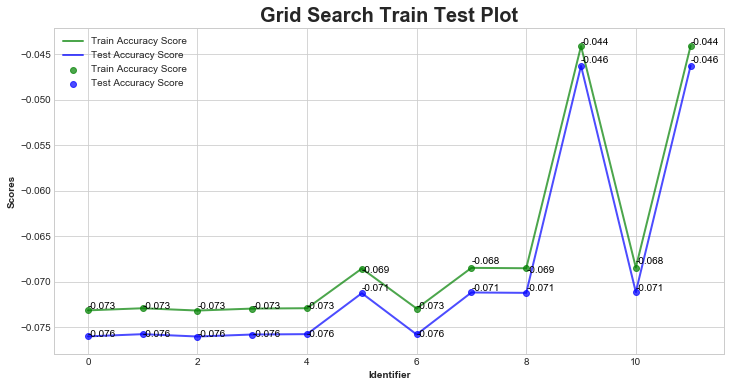

In [578]:
grid_train_test_plot(svrrbfresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'show')

In [270]:
svrrbfresults[['identifier','identifier_name']].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
identifier,0,1,2,3,4,5,6,7,8,9,10,11
identifier_name,"'C': 0.1, 'epsilon': 0.1, 'gamma': 0.0001","'C': 0.1, 'epsilon': 0.1, 'gamma': 0.001","'C': 0.1, 'epsilon': 1, 'gamma': 0.0001","'C': 0.1, 'epsilon': 1, 'gamma': 0.001","'C': 1, 'epsilon': 0.1, 'gamma': 0.0001","'C': 1, 'epsilon': 0.1, 'gamma': 0.001","'C': 1, 'epsilon': 1, 'gamma': 0.0001","'C': 1, 'epsilon': 1, 'gamma': 0.001","'C': 10, 'epsilon': 0.1, 'gamma': 0.0001","'C': 10, 'epsilon': 0.1, 'gamma': 0.001","'C': 10, 'epsilon': 1, 'gamma': 0.0001","'C': 10, 'epsilon': 1, 'gamma': 0.001"


In [25]:
rsvrreg_accuracy_train = rsvr_grid_search.best_estimator_.score(X_train, y_train)
rsvrreg_accuracy_test = rsvr_grid_search.best_estimator_.score(X_test, y_test)

print('Rbf SVR Regression - Train Accuracy: %.2f'%rsvrreg_accuracy_train)
print('Rbf SVR Regression - Test Accuracy: %.2f '%rsvrreg_accuracy_test)

Rbf SVR Regression - Train Accuracy: -0.04
Rbf SVR Regression - Test Accuracy: -0.04 


In [316]:
report_table = report_table + [['Rbf Kernel SVR Regression', str(rsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),rsvrreg_accuracy_train,rsvrreg_accuracy_test ]]

## Grid Search, Cross Validation with poly Kernel SVR

In [26]:
svrpolyreg = SVR(kernel='poly')
parameters = {'C':[0.1,1,10],'gamma':[0.0001,0.001],'degree':[2,3],'epsilon':[0.1,1]}
psvr_grid_search = GridSearchCV(svrpolyreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
psvr_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(psvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(psvr_grid_search.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 62.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 79.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 114.2min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 144.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 174.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 203.3min
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed: 241.7min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 243.6min finished


Best parameters: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validation score: -0.08


In [271]:
svrpolyresults = pd.DataFrame(psvr_grid_search.cv_results_)
svrpolyresults['identifier_name'] = svrpolyresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
svrpolyresults['identifier'] = svrpolyresults.index

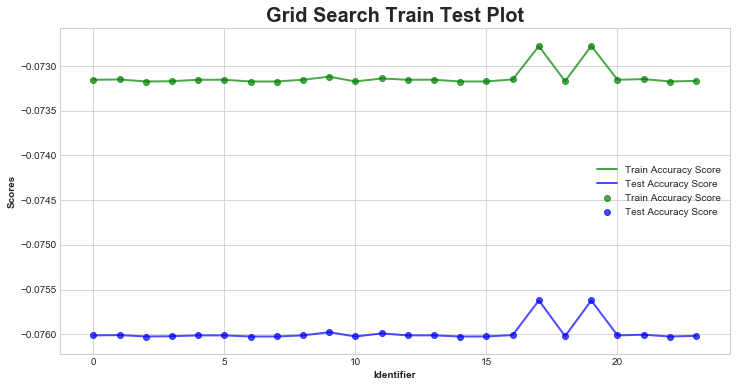

In [579]:
grid_train_test_plot(svrpolyresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'hide')

In [273]:
svrpolyresults[['identifier','identifier_name']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
identifier,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
identifier_name,"'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.0001","'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.001","'C': 0.1, 'degree': 2, 'epsilon': 1, 'gamma': 0.0001","'C': 0.1, 'degree': 2, 'epsilon': 1, 'gamma': 0.001","'C': 0.1, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.0001","'C': 0.1, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.001","'C': 0.1, 'degree': 3, 'epsilon': 1, 'gamma': 0.0001","'C': 0.1, 'degree': 3, 'epsilon': 1, 'gamma': 0.001","'C': 1, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.0001","'C': 1, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.001",...,"'C': 1, 'degree': 3, 'epsilon': 1, 'gamma': 0.0001","'C': 1, 'degree': 3, 'epsilon': 1, 'gamma': 0.001","'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.0001","'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.001","'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.0001","'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.001","'C': 10, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.0001","'C': 10, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.001","'C': 10, 'degree': 3, 'epsilon': 1, 'gamma': 0.0001","'C': 10, 'degree': 3, 'epsilon': 1, 'gamma': 0.001"


In [27]:
psvrreg_accuracy_train = psvr_grid_search.best_estimator_.score(X_train, y_train)
psvrreg_accuracy_test = psvr_grid_search.best_estimator_.score(X_test, y_test)

print('Poly SVR Regression - Train Accuracy: %.2f'%psvrreg_accuracy_train)
print('Poly SVR Regression - Test Accuracy: %.2f '%psvrreg_accuracy_test)

Poly SVR Regression - Train Accuracy: -0.07
Poly SVR Regression - Test Accuracy: -0.07 


In [317]:
report_table = report_table + [['Poly Kernel SVR Regression', str(psvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),psvrreg_accuracy_train,psvrreg_accuracy_test ]]

In [390]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 'Train Accuracy', 'Test Accuracy'])
report.index = report['Model Name']
report.drop(['Model Name'], axis=1,inplace=True)
report

,Model Parameters,Train Accuracy,Test Accuracy
Model Name,,,
Linear Regression,"fit_intercept: True, normalize: True",0.945702,0.962427
SGD Regression,"alpha: 0.05, learning_rate: constant, loss: squared_epsilon_insensitive, penalty: l1",0.923512,0.931561
KNN Regression,n_neighbors: 4,0.945159,0.893353
Ridge Regression,"alpha: 0.01, fit_intercept: True, normalize: True",0.943249,0.960212
Lasso Regression,"alpha: 0.01, fit_intercept: False, normalize: True, selection: random",0.943651,0.961776
Polynomial Regression,"linearregression__fit_intercept: False, linearregression__normalize: True, polynomialfeatures__degree: 2",0.981160,0.227186
Linear SVR Regression,"C: 1, epsilon: 0.1, loss: squared_epsilon_insensitive",0.942715,0.959531
Linear Kernel SVR Regression,"C: 10, epsilon: 1",0.843607,0.874634
Rbf Kernel SVR Regression,"C: 10, epsilon: 1, gamma: 0.001",-0.038596,-0.036365


In [420]:
report['identifier'] = report.index
report['identifier'] = report.identifier.apply(lambda x: str(x).replace('Regression',''))

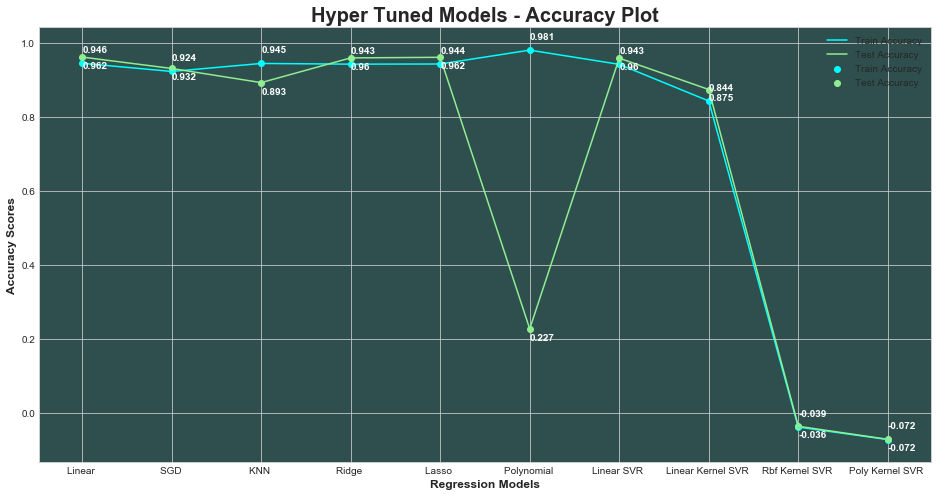

In [611]:
%matplotlib inline
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111,facecolor='darkslategray')
ax.plot(report['identifier'], report['Train Accuracy'], c = 'cyan')
ax.plot(report['identifier'], report['Test Accuracy'], c = 'lightgreen')
ax.scatter(report['identifier'], report['Train Accuracy'], c = 'cyan')
ax.scatter(report['identifier'], report['Test Accuracy'], c = 'lightgreen')
for i,j in zip(report['identifier'],round(report['Train Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j+0.03),color='white',weight='bold')
for i,j in zip(report['identifier'],round(report['Test Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j-0.03),color='white',weight='bold')
ax.legend()
ax.set_title('Hyper Tuned Models - Accuracy Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=12,weight='bold')
ax.set_ylabel('Accuracy Scores',fontsize=12,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

Train and test scores of Linear Regression, Ridge Regression, Lasso Regression, Linear SVR Regression are around 94% and 96% respectively.

Linear SVR is computationaly intensive. In Linear Regression, the magnitude of few coefficients may be higher thereby giving higher importance to certain features. This may result in overfitting of training data. Regularization techniques like Ridge and Lasso overcomes this issue.

Ridge regression will retain all the features but will shrink the coefficients. The problem is that model will still remain complex leading to poor model performance. Whereas, Lasso regression does both parameter shrinkage and variable selection. It retains only one variable among correlated variables and sets other correlated variables to zero.

With same accuracy score, though Ridge regression is faster, Lasso has the advantage of completely reducing unnecessary parameters in the model and hence, considered as best model for this dataset.

## Lasso Regression - Buzz Magnitude Prediction

Fitting Lasso regression on the entire dataset.

In [597]:
lasso_reg = Lasso(alpha=0.01,fit_intercept=False,normalize=True,selection='random')
lasso_reg.fit(X_train_final, y_train_final)
print("The accuracy of Train Dataset from Lasso Regression is: ",lasso_reg.score(X_train_final, y_train_final))
print("The accuracy of Test Dataset from Lasso Regression is: ",lasso_reg.score(X_test_final, y_test_final))

The accuracy of Train Dataset from Lasso Regression is:  0.9300136156413303
The accuracy of Test Dataset from Lasso Regression is:  0.9474995208020222


## Conclusion

*Lasso Regression will predict the buzz magnitude of future unseen topics with accuracy score of 94%*